In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Classification Models 

- k-nearest neighbors (knn) 
- logistic regression 
- classification trees
- random forests 
- gradient boosting 
- neural networks 
- etc

### KNN Models 

- data points of two types/with two different labels. 
- add a new data point 
- goal is to predict the label of the new point 
     - k = 4 (the four nearest neighbors to the new point) 
     - use the probabilities associated with those four of the two kinds of labels to predicts the label for the fifth 
         - p(label 1) = 3/4
         - p(label 2) = 1/4 
         - prediction is label 1

### Weighted KNN Models 

- we weight points by the inverse of their distance to the new point 
    - p(label 1) = $\frac{\frac{1}{d_1}+\frac{1}{d_2}+\frac{1}{d_3}}{\frac{1}{d_1}+\frac{1}{d_2}+\frac{1}{d_3}+\frac{1}{d_4}}$
    - p(label 2) = $\frac{\frac{1}{d_4}}{\frac{1}{d_1}+\frac{1}{d_2}+\frac{1}{d_3}+\frac{1}{d_4}}$

### Logistic Regression Models 

- Binary Classifiers
    - two label classes  
    - we aim to fit a line (or hyperplane in higher dimensions) to a dataset
    - used to
        - produce a so-called trend line (or curve) that can be used to help visually summarize, drive home a particular point
          about the data under study
        - learn a model so that precise predictions can be made regarding output values in the future
    - sklearn.linear_model.LogisticRegression

## Questions 

- Which model should I use? (knn, logreg, etc.)
- How do I choose model hyperparameters? (like n_neighbors)
- Will the model perform well on new data? 


### Evaluation Metrics 

- $\textbf{accuracy}$ 
    - percentage of correct predictions
    <br>
    <br>
- $\textbf{confusion matrix}$
    - 2 by 2 matrix, columns are actual labels class one and class two. Rows are predicted labels class one and class two. 
    <br>
    <br>
    - $ \begin{matrix} - & \text{class 1} & \text{class 2} \\
                      \text{class 1} & \text{True Positives (TP)} & \text{False Positive (FP)}\\
                      \text{class 2} & \text{False Negative (FN)} & \text{True Negative (TN)}
       \end{matrix}$
    <br> 
    <br>
    - ideally $\begin{bmatrix} * & 0\\
                               0 & *
               \end{bmatrix} $
    <br>
    <br>
- $\textbf{recall}$ 
    - $\frac{TP}{TP + FN}$
    - When the actual label is 1, how often is the prediction correct? 
    <br>
    <br>
- $\textbf{precision}$ 
    - $\frac{TP}{FP + TP}$
    - when the predictioin is 1, how often is the prediction correct? 
    
            - Spam detector 
                - class 1: spam 
                - class 2: not spam 
                    - recall/precision? Precision. Needs to catch when prediction is 1, because if something not spam goes 
                    to spam (false positive) that's a problem 
                
            - Fradulent transaction detector 
                - class 1: fraud 
                - class 2: not fraud 
                     - Recall. Needs to catch when the actual label is 1. If something is fraud and gets classified as not 
                     fraud (false negative) that's a problem. 

- Recall = $\frac{TP}{TP+FN}$
    - low score means a lot of false negatives, so use if you care about FN 
- Precision = $\frac{TP}{TP+FP}$
    - low score means a lot of false positives, so use if you care about FN
- the model above has a lot of false positives. Since the model is diagnosing diabetes, a false positive and a false negative is not good. As a general rule if the score you care about is .5 or lower, you should try a different model 
- If we use rows (x) as the actual value and columns (y) as predicted values using (x,y), then 
    - (1,1) is true positive
    - (1,0) is false negative 
    - (0,1) is false positive 
    - (0,0) is true positive 

### Example 

In [7]:
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/iris.csv'
iris = pd.read_csv(path)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Each row is a flower. For each flower we have four features (sepal length, sepal width, petal length, and petal width), and the species. 

The goal is to use the features to predict the species. 

In [8]:
iris.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [9]:
# feature matrix X - target vector y 
X = iris.drop('species', axis = 1) 
y = iris.species 

In [10]:
# import the knn model 
from sklearn.neighbors import KNeighborsClassifier as knn

In [11]:
# instantiate the classifier 
knn_clf = knn(n_neighbors=10, weights='uniform') #uniform or distance 

In [12]:
# fit the model to the data 
knn_clf.fit(X,y)

KNeighborsClassifier(n_neighbors=10)

In [13]:
# apply the model to new data 
new_flowers = [[5,3,4,2],[5,4,3,1]]
knn_clf.predict(new_flowers)

C:\Users\rebec\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor', 'Iris-setosa'], dtype=object)

## Toy dataset - Three Blobs Example 


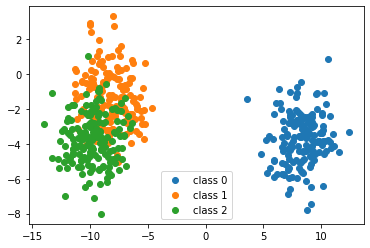

In [14]:
# three blobs dataset 
from sklearn.datasets import make_blobs as mb
X, y = mb(n_samples=500, centers=3, cluster_std=1.5)
plt.scatter(X[y==0,0],X[y==0,1],label='class 0')
plt.scatter(X[y==1,0],X[y==1,1],label='class 1')
plt.scatter(X[y==2,0],X[y==2,1],label='class 2')
plt.legend()

In [15]:
knn_clf = knn(n_neighbors=10, weights='uniform')
knn_clf.fit(X,y)

KNeighborsClassifier(n_neighbors=10)

In [16]:
new_points = [[0,5],[-2,-5],[8,-10]]

In [17]:
knn_clf.predict(new_points)

array([1, 1, 0])

In [18]:

def draw_classification_regions(X,y,model):
    
    from matplotlib.colors import ListedColormap
    # create a mesh grid
    h = .1
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # evaluate classifier at all mesh grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # number of classes
    n_classes = len(np.unique(y))

    # Put the result into a color plot
    fig, ax = plt.subplots(figsize=(10,5))
    colors = ['C0','C1','C2']
    if n_classes==3:
        custom_cmap = ListedColormap(['#9898ff','#fafab0','#a0faa0'])
    else:
        custom_cmap = ListedColormap(['#9898ff','#fafab0'])
        
    ax.contourf(xx, yy, Z, cmap=custom_cmap)

    # plot dataset
    for i in range(n_classes):
        ax.scatter(X[y==i,0], X[y==i,1], c = colors[i], label='class '+str(i), s=75, alpha=0.8)

    ax.set_xlabel('feature #1', fontsize=15)
    ax.set_ylabel('feature #2', fontsize=15)

    ax.legend()

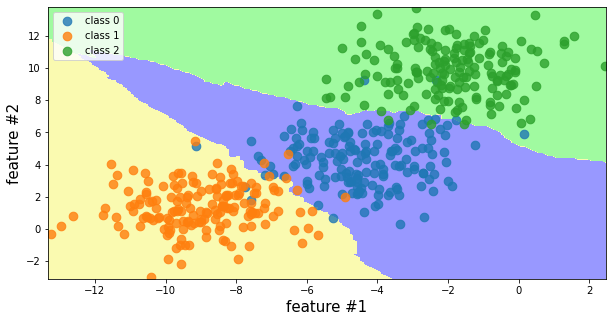

In [38]:
draw_classification_regions(X,y,knn_clf)

## Logistic Regression Three Blobs

In [21]:
from sklearn.linear_model import LogisticRegression as logreg
logreg_clf = logreg()
logreg_clf.fit(X,y)

LogisticRegression()

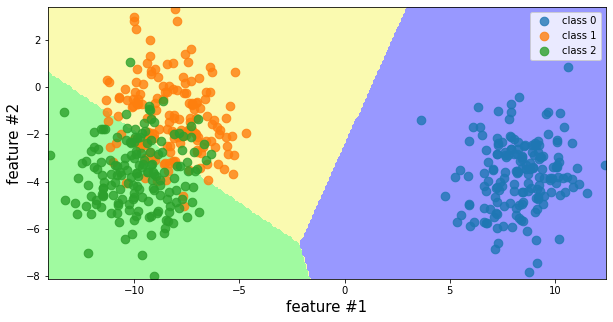

In [22]:
draw_classification_regions(X,y,logreg_clf)

## Two Circles Data Set

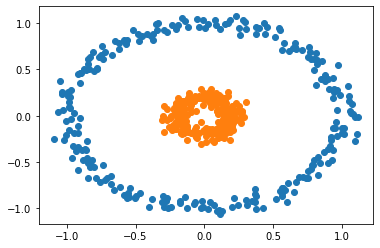

In [23]:
# two circles dataset 
from sklearn.datasets import make_circles 
X,y = make_circles(n_samples=500,noise=0.05,factor=0.2)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

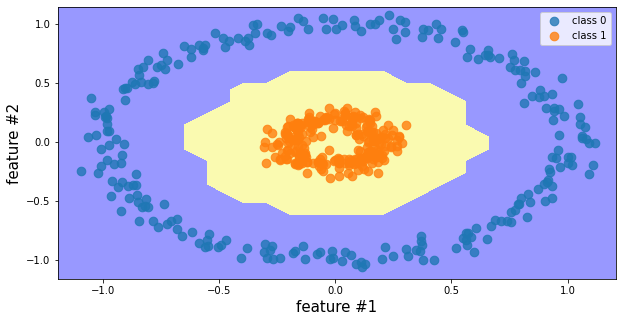

In [24]:
knn_clf.fit(X,y)
draw_classification_regions(X,y,knn_clf)

### Two Circles Log Reg

In [25]:
logreg_clf.fit(X,y)

LogisticRegression()

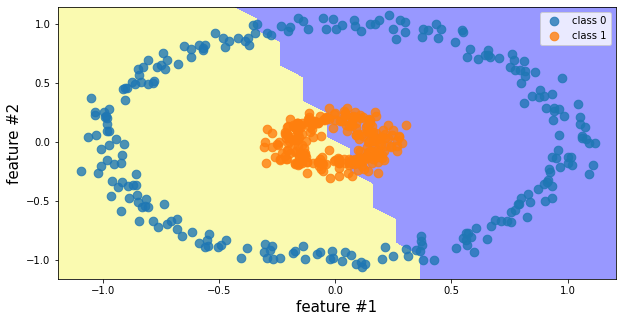

In [26]:
draw_classification_regions(X,y,logreg_clf)

#doesn't work because you can't split a circle into lines 

## Two Moons data set

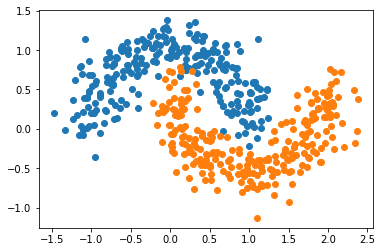

In [27]:
# two moons data set 
from sklearn.datasets import make_moons 
X,y = make_moons(n_samples=500,noise=0.2)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

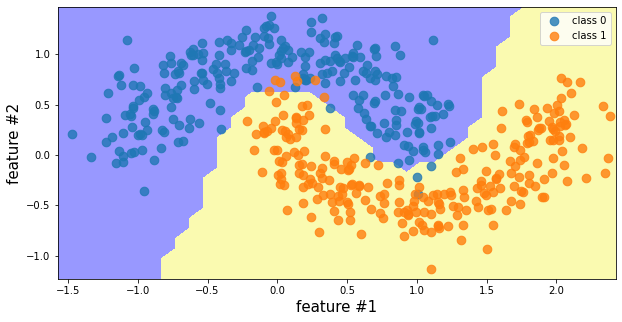

In [28]:
knn_clf = knn(n_neighbors=40)
knn_clf.fit(X,y)
draw_classification_regions(X,y,knn_clf)

# Two moons log reg

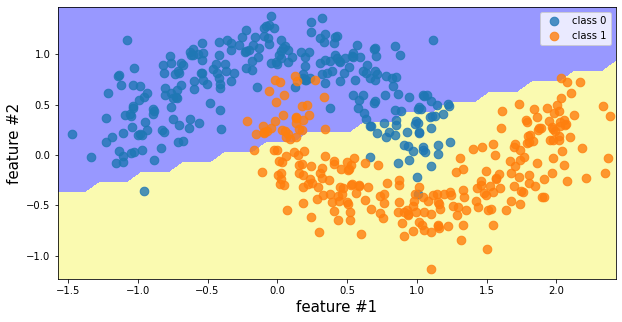

In [29]:
logreg_clf.fit(X,y)
draw_classification_regions(X,y,logreg_clf)